# Mahsa Massoud
## 810198032
## AI- project5 -Phase2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/UTKFace.tar.gz" .

In [3]:
!tar xvzf UTKFace.tar.gz

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [4]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report
import tensorboard

In [130]:
img_path = []
races = []
path = "/content/UTKFace"
for img in os.listdir(path):
  temp = img.split('.')
  if len(temp[0].split('_')) == 4:
    img_path.append(os.path.join(path, img))
    age, gender, race, date = temp[0].split('_')
    races.append(race)

In [131]:
class_labels = { 0:"White" , 1 : "Black" , 2:"Asian" ,
                3:"Indian" , 4:"Others"}

races = [str(to_categorical(i,len(class_labels))) for i in races]

df = pd.DataFrame({'image' : img_path , 'Race': races})

One hot encoding is done inorder to eliminate the effect of numbers and their meanings for model, because they are just labels and the absolute value and difference between them is meaningless and this subject should induce to model by one hot encoding. 

In [132]:
df

,image,Race
0,/content/UTKFace/25_1_1_20170117142659506.jpg....,[0. 1. 0. 0. 0.]
1,/content/UTKFace/7_0_3_20170119144311624.jpg.c...,[0. 0. 0. 1. 0.]
2,/content/UTKFace/1_1_3_20161220220119985.jpg.c...,[0. 0. 0. 1. 0.]
3,/content/UTKFace/70_0_0_20170117175207508.jpg....,[1. 0. 0. 0. 0.]
4,/content/UTKFace/35_0_1_20170113155156475.jpg....,[0. 1. 0. 0. 0.]
...,...,...
23700,/content/UTKFace/35_0_1_20170113182403214.jpg....,[0. 1. 0. 0. 0.]
23701,/content/UTKFace/28_0_1_20170113133624449.jpg....,[0. 1. 0. 0. 0.]
23702,/content/UTKFace/58_1_1_20170112213645366.jpg....,[0. 1. 0. 0. 0.]
23703,/content/UTKFace/30_0_1_20170117123820956.jpg....,[0. 1. 0. 0. 0.]


In [133]:
dataGenerator = preprocessing.image.ImageDataGenerator(rescale=1.0/255, validation_split=0.25)

In [134]:
X_train = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = "image",
    y_col = "Race",
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    subset = 'training',
    shuffle = False
)

Found 17779 validated image filenames belonging to 5 classes.


In [135]:
X_test = dataGenerator.flow_from_dataframe(
    dataframe = df,
    x_col = "image",
    y_col = "Race",
    target_size = (100, 100),
    color_mode = "grayscale",
    batch_size = 32,
    subset = 'validation',
    shuffle = False
)

Found 5926 validated image filenames belonging to 5 classes.


In [102]:
type(df.index)

pandas.core.indexes.range.RangeIndex

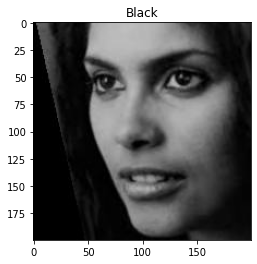

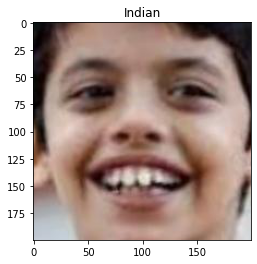

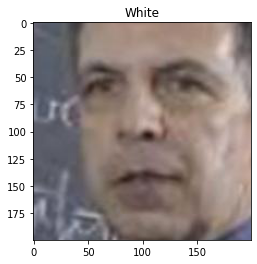

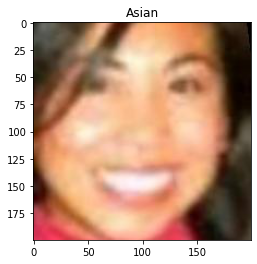

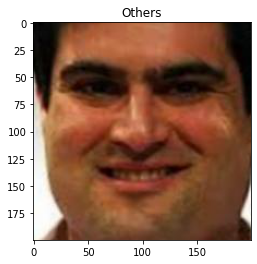

<BarContainer object of 5 artists>

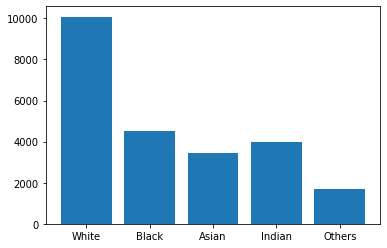

In [149]:
import cv2

counters = [0,0,0,0,0]
Printeds = [0,0,0,0,0]
for i in df.index:
  race_list = df['Race'][i]
  label_index = race_list.index(1)
  counters[label_index] += 1
  if( Printeds[label_index] == 0):
    plt.figure()
    img = cv2.cvtColor(cv2.imread(df['image'][i]) ,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(class_labels[label_index])
    plt.show()
    Printeds[label_index] = 1
plt.bar(class_labels.values, counters)


In [11]:
from keras.layers import Dense, Activation, Flatten
inp = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(inp)
output = layers.Dense(1024, activation="relu")(output)
output = layers.Dense(512, activation="relu")(output)
output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              10241024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


Model.summary givs us the structure of the model which has input layer of (100,100,1) and that is exactly like the image's input shape.  then we have flatten layer which is 10000 = 100*100*1 to give the model flatted matrix, after that we have used 2 dense layers with 1024 and 512 neurons respectively.these layers make our parameters : For the dense_1 layer , number of params is 1024. This is obtained as : 10000 (input values) * 1024 (neurons in the first layer) + 1024 (bias values).
For dense_2 layer, number of params is 524800. This is obtained as : 1024 (input values) * 512 (neurons in the second layer) + 512 (bias values for neurons in the second layer)
and the output is 2565 = (512+1) *5. that one is for connection between bias.

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, validation_data=X_test, epochs=10)

Epoch 1/10
556/556 [==============================] - 54s 97ms/step - loss: 1.2774 - accuracy: 0.4988 - val_loss: 1.2522 - val_accuracy: 0.4887
Epoch 2/10
556/556 [==============================] - 54s 97ms/step - loss: 1.1063 - accuracy: 0.5876 - val_loss: 1.0069 - val_accuracy: 0.6293
Epoch 3/10
556/556 [==============================] - 54s 96ms/step - loss: 1.0312 - accuracy: 0.6196 - val_loss: 0.9705 - val_accuracy: 0.6348
Epoch 4/10
556/556 [==============================] - 54s 98ms/step - loss: 0.9674 - accuracy: 0.6484 - val_loss: 0.9085 - val_accuracy: 0.6792
Epoch 5/10
556/556 [==============================] - 54s 97ms/step - loss: 0.9334 - accuracy: 0.6616 - val_loss: 0.8733 - val_accuracy: 0.6875
Epoch 6/10
556/556 [==============================] - 54s 97ms/step - loss: 0.9030 - accuracy: 0.6775 - val_loss: 0.8962 - val_accuracy: 0.6731
Epoch 7/10
556/556 [==============================] - 53s 96ms/step - loss: 0.8823 - accuracy: 0.6813 - val_loss: 0.8794 - val_accuracy:

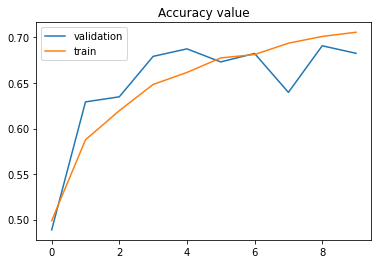

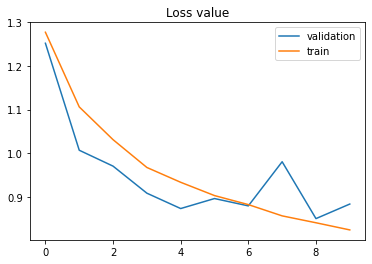

In [ ]:
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(10), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(10), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(10), history.history["val_loss"], label="validation")
plt.plot(np.arange(10), history.history["loss"], label = "train")
plt.legend()
plt.show()

In [ ]:
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.29      0.03      0.05       441
       Black       0.70      0.39      0.50       984
       Asian       0.66      0.73      0.69       873
      Indian       0.89      0.65      0.75      1124
      Others       0.64      0.91      0.75      2504

    accuracy                           0.68      5926
   macro avg       0.64      0.54      0.55      5926
weighted avg       0.67      0.68      0.65      5926



In [ ]:
y_true_train  = X_train.labels
y_pred_train = np.argmax(model.predict(X_train) , axis = 1)

print("Classification Report fot Training data")
print()
print(classification_report(y_true_train, y_pred_train, target_names =[class_labels[i] for i in class_labels]))

Classification Report fot Training data

              precision    recall  f1-score   support

       White       0.49      0.03      0.06      1251
       Black       0.75      0.46      0.57      2991
       Asian       0.70      0.74      0.72      2561
      Indian       0.91      0.66      0.76      3402
      Others       0.66      0.93      0.77      7574

    accuracy                           0.71     17779
   macro avg       0.70      0.56      0.58     17779
weighted avg       0.72      0.71      0.68     17779



## Phase 3

In [20]:
def test_network(activation , momentum = 0):
  inp = layers.Input(shape = (100, 100, 1))

  output = layers.Flatten()(inp)
  output = layers.Dense(1024, activation=activation)(output)
  output = layers.Dense(512, activation=activation)(output)
  output = layers.Dense(5, activation="softmax")(output)

  model = models.Model(inputs = inp, outputs = output)
  model.compile(optimizer=optimizers.SGD(learning_rate=0.01,  momentum = momentum ), loss="categorical_crossentropy", metrics=["accuracy"])
  history = model.fit(X_train, validation_data=X_test, epochs=10)
  y_true  = X_test.labels
  y_pred = np.argmax(model.predict(X_test) , axis = 1)

  print("Classification Report fot Testing data for " , activation , " function :")
  print()
  print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
  plt.figure()
  plt.title('Accuracy value')
  plt.plot(np.arange(10), history.history["val_accuracy"], label='validation')
  plt.plot(np.arange(10), history.history["accuracy"], label='train')
  plt.legend()
  plt.show()

  plt.figure()
  plt.title('Loss value')
  plt.plot(np.arange(10), history.history["val_loss"], label="validation")
  plt.plot(np.arange(10), history.history["loss"], label = "train")
  plt.legend()
  plt.show()
  y_true  = X_test.labels
  y_pred = np.argmax(model.predict(X_test) , axis = 1)

  print("Classification Report fot Testing data :")
  print()
  print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

Epoch 1/10
556/556 [==============================] - 51s 90ms/step - loss: 1.3524 - accuracy: 0.4841 - val_loss: 1.1983 - val_accuracy: 0.5294
Epoch 2/10
556/556 [==============================] - 49s 89ms/step - loss: 1.1575 - accuracy: 0.5617 - val_loss: 1.2840 - val_accuracy: 0.4941
Epoch 3/10
556/556 [==============================] - 49s 89ms/step - loss: 1.0643 - accuracy: 0.6024 - val_loss: 0.9543 - val_accuracy: 0.6505
Epoch 4/10
556/556 [==============================] - 49s 89ms/step - loss: 1.0077 - accuracy: 0.6297 - val_loss: 0.9583 - val_accuracy: 0.6347
Epoch 5/10
556/556 [==============================] - 50s 89ms/step - loss: 0.9618 - accuracy: 0.6474 - val_loss: 0.9740 - val_accuracy: 0.6352
Epoch 6/10
556/556 [==============================] - 50s 89ms/step - loss: 0.9258 - accuracy: 0.6661 - val_loss: 0.9238 - val_accuracy: 0.6718
Epoch 7/10
556/556 [==============================] - 49s 89ms/step - loss: 0.8937 - accuracy: 0.6764 - val_loss: 0.9295 - val_accuracy:

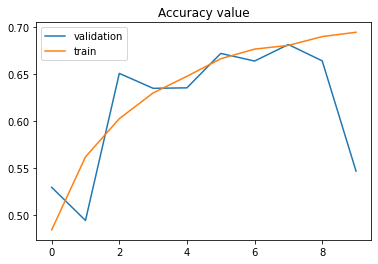

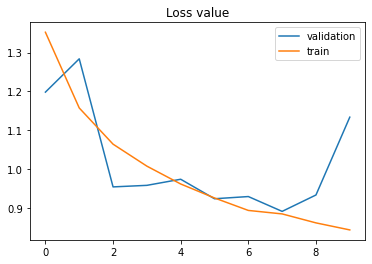

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.50      0.00      0.00       424
       Black       0.30      0.93      0.45      1030
       Asian       0.80      0.47      0.59       840
      Indian       0.82      0.68      0.74      1135
      Others       0.86      0.45      0.59      2497

    accuracy                           0.55      5926
   macro avg       0.66      0.51      0.48      5926
weighted avg       0.72      0.55      0.55      5926



In [18]:
test_network('tanh')

In [ ]:
test_network('sigmoid')

Epoch 1/10
556/556 [==============================] - 56s 100ms/step - loss: 1.3961 - accuracy: 0.4459 - val_loss: 1.3523 - val_accuracy: 0.4737
Epoch 2/10
556/556 [==============================] - 54s 96ms/step - loss: 1.3232 - accuracy: 0.4828 - val_loss: 1.2998 - val_accuracy: 0.4762
Epoch 3/10
556/556 [==============================] - 54s 96ms/step - loss: 1.2714 - accuracy: 0.5016 - val_loss: 1.2540 - val_accuracy: 0.5007
Epoch 4/10
556/556 [==============================] - 53s 96ms/step - loss: 1.2238 - accuracy: 0.5212 - val_loss: 1.2104 - val_accuracy: 0.5290
Epoch 5/10
556/556 [==============================] - 53s 96ms/step - loss: 1.1733 - accuracy: 0.5468 - val_loss: 1.2224 - val_accuracy: 0.5364
Epoch 6/10
 86/556 [===>..........................] - ETA: 37s - loss: 1.1443 - accuracy: 0.5643

In [ ]:
test_network('LeakyReLU')

Epoch 1/10
556/556 [==============================] - 53s 95ms/step - loss: 1.2915 - accuracy: 0.5032 - val_loss: 1.1690 - val_accuracy: 0.5334
Epoch 2/10
556/556 [==============================] - 53s 95ms/step - loss: 1.0993 - accuracy: 0.5880 - val_loss: 1.0024 - val_accuracy: 0.6306
Epoch 3/10
556/556 [==============================] - 54s 96ms/step - loss: 1.0124 - accuracy: 0.6303 - val_loss: 0.9320 - val_accuracy: 0.6698
Epoch 4/10
556/556 [==============================] - 54s 97ms/step - loss: 0.9672 - accuracy: 0.6480 - val_loss: 0.9582 - val_accuracy: 0.6585
Epoch 5/10
556/556 [==============================] - 54s 97ms/step - loss: 0.9370 - accuracy: 0.6617 - val_loss: 0.9019 - val_accuracy: 0.6623
Epoch 6/10
556/556 [==============================] - 54s 97ms/step - loss: 0.9010 - accuracy: 0.6758 - val_loss: 0.9382 - val_accuracy: 0.6527
Epoch 7/10
556/556 [==============================] - 53s 96ms/step - loss: 0.8840 - accuracy: 0.6831 - val_loss: 0.9504 - val_accuracy:

So we can see that the best model is with relu function (VS tanh, LeakyReLU and sigmoid)

Momentum allows the optimizer to maintain the velocity and trajectory from previous time steps to affect the present.The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation. 
$
velocity = momentum * velocity - learningRate * g
$

$
w = w + velocity
$

Epoch 1/10
556/556 [==============================] - 54s 97ms/step - loss: 1.2440 - accuracy: 0.5178 - val_loss: 1.0145 - val_accuracy: 0.6286
Epoch 2/10
556/556 [==============================] - 54s 97ms/step - loss: 1.0413 - accuracy: 0.6156 - val_loss: 1.0027 - val_accuracy: 0.6105
Epoch 3/10
556/556 [==============================] - 53s 96ms/step - loss: 0.9730 - accuracy: 0.6451 - val_loss: 0.9129 - val_accuracy: 0.6625
Epoch 4/10
556/556 [==============================] - 53s 96ms/step - loss: 0.9283 - accuracy: 0.6631 - val_loss: 0.8724 - val_accuracy: 0.6882
Epoch 5/10
556/556 [==============================] - 53s 95ms/step - loss: 0.8893 - accuracy: 0.6799 - val_loss: 0.9314 - val_accuracy: 0.6679
Epoch 6/10
556/556 [==============================] - 53s 95ms/step - loss: 0.8650 - accuracy: 0.6922 - val_loss: 0.9007 - val_accuracy: 0.6672
Epoch 7/10
556/556 [==============================] - 53s 95ms/step - loss: 0.8443 - accuracy: 0.6963 - val_loss: 0.8690 - val_accuracy:

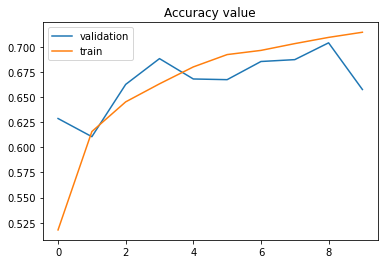

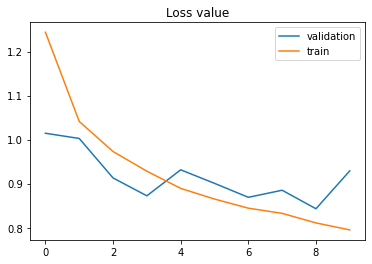

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.26      0.08      0.12       424
       Black       0.64      0.56      0.60      1030
       Asian       0.85      0.36      0.51       840
      Indian       0.88      0.61      0.72      1135
      Others       0.61      0.92      0.73      2497

    accuracy                           0.66      5926
   macro avg       0.65      0.51      0.54      5926
weighted avg       0.68      0.66      0.63      5926



In [19]:
# 1 : Optimizer
test_network('relu' , 0.5)

Epoch 1/10
556/556 [==============================] - 53s 95ms/step - loss: 1.3145 - accuracy: 0.4947 - val_loss: 1.2053 - val_accuracy: 0.5332
Epoch 2/10
556/556 [==============================] - 53s 95ms/step - loss: 1.1907 - accuracy: 0.5539 - val_loss: 1.3112 - val_accuracy: 0.4900
Epoch 3/10
556/556 [==============================] - 53s 95ms/step - loss: 1.1164 - accuracy: 0.5836 - val_loss: 1.2361 - val_accuracy: 0.5341
Epoch 4/10
556/556 [==============================] - 53s 95ms/step - loss: 1.0756 - accuracy: 0.6018 - val_loss: 0.9921 - val_accuracy: 0.6352
Epoch 5/10
556/556 [==============================] - 53s 95ms/step - loss: 1.0380 - accuracy: 0.6178 - val_loss: 1.0716 - val_accuracy: 0.6004
Epoch 6/10
556/556 [==============================] - 53s 94ms/step - loss: 1.0037 - accuracy: 0.6329 - val_loss: 0.9797 - val_accuracy: 0.6552
Epoch 7/10
556/556 [==============================] - 53s 95ms/step - loss: 0.9707 - accuracy: 0.6534 - val_loss: 0.9207 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


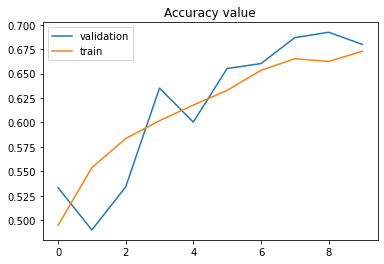

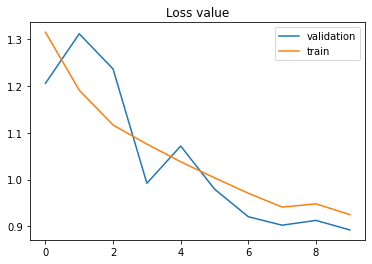

Classification Report fot Testing data :

              precision    recall  f1-score   support

       White       0.00      0.00      0.00       424
       Black       0.65      0.40      0.50      1030
       Asian       0.78      0.60      0.68       840
      Indian       0.66      0.81      0.73      1135
      Others       0.67      0.88      0.76      2497

    accuracy                           0.68      5926
   macro avg       0.55      0.54      0.53      5926
weighted avg       0.63      0.68      0.64      5926



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
test_network('relu' , 0.9)

we can see that with momentum = 0.5 , the accuracy remains same approximately but oscillation has been reduced.If we increase the number of epochs, we may geet better results.
in case which momentum is 0.9, the accuracy has been even reduced due to the fact that the network has been biased to initial weights and learning reate is almost meaningless.

Adam

Epoch 1/10
556/556 [==============================] - 58s 104ms/step - loss: 1.4516 - accuracy: 0.5304 - val_loss: 1.1180 - val_accuracy: 0.5749
Epoch 2/10
556/556 [==============================] - 58s 104ms/step - loss: 1.0308 - accuracy: 0.6247 - val_loss: 0.9225 - val_accuracy: 0.6787
Epoch 3/10
556/556 [==============================] - 58s 104ms/step - loss: 0.9719 - accuracy: 0.6500 - val_loss: 0.9065 - val_accuracy: 0.6762
Epoch 4/10
556/556 [==============================] - 58s 104ms/step - loss: 0.9139 - accuracy: 0.6726 - val_loss: 0.9316 - val_accuracy: 0.6693
Epoch 5/10
556/556 [==============================] - 58s 104ms/step - loss: 0.9012 - accuracy: 0.6809 - val_loss: 0.8975 - val_accuracy: 0.6806
Epoch 6/10
556/556 [==============================] - 58s 104ms/step - loss: 0.8835 - accuracy: 0.6836 - val_loss: 1.0941 - val_accuracy: 0.5894
Epoch 7/10
556/556 [==============================] - 58s 104ms/step - loss: 0.8836 - accuracy: 0.6851 - val_loss: 0.9344 - val_ac

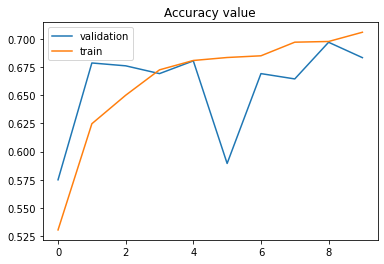

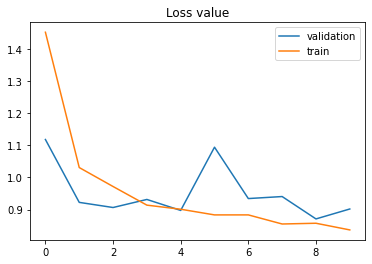

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.28      0.04      0.08       424
       Black       0.77      0.37      0.50      1030
       Asian       0.58      0.78      0.66       840
      Indian       0.69      0.82      0.75      1135
      Others       0.72      0.83      0.77      2497

    accuracy                           0.68      5926
   macro avg       0.61      0.57      0.55      5926
weighted avg       0.67      0.68      0.65      5926



In [23]:
inp = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(inp)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, validation_data=X_test, epochs=10)
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data for " , 'relu' , " function :")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(10), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(10), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(10), history.history["val_loss"], label="validation")
plt.plot(np.arange(10), history.history["loss"], label = "train")
plt.legend()
plt.show()
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

In this case using Adam optimizer makes the model a little bit better in accuracy and it is becuase the  of the higher speed and higher accuracy which adam has versus SGD.

## Epoch

Epoch 1/20
556/556 [==============================] - 59s 105ms/step - loss: 1.5236 - accuracy: 0.5099 - val_loss: 1.0254 - val_accuracy: 0.6333
Epoch 2/20
556/556 [==============================] - 59s 106ms/step - loss: 1.0292 - accuracy: 0.6302 - val_loss: 0.9537 - val_accuracy: 0.6485
Epoch 3/20
556/556 [==============================] - 58s 104ms/step - loss: 0.9514 - accuracy: 0.6582 - val_loss: 0.9855 - val_accuracy: 0.6504
Epoch 4/20
556/556 [==============================] - 59s 105ms/step - loss: 0.9159 - accuracy: 0.6728 - val_loss: 0.9398 - val_accuracy: 0.6684
Epoch 5/20
556/556 [==============================] - 58s 104ms/step - loss: 0.9177 - accuracy: 0.6732 - val_loss: 0.8879 - val_accuracy: 0.6819
Epoch 6/20
556/556 [==============================] - 59s 105ms/step - loss: 0.8774 - accuracy: 0.6901 - val_loss: 0.8752 - val_accuracy: 0.6846
Epoch 7/20
556/556 [==============================] - 59s 106ms/step - loss: 0.8545 - accuracy: 0.6978 - val_loss: 0.9097 - val_ac

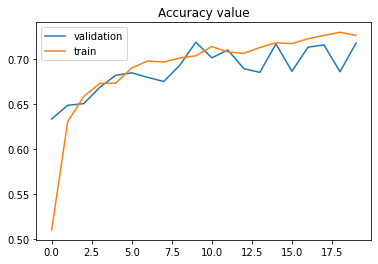

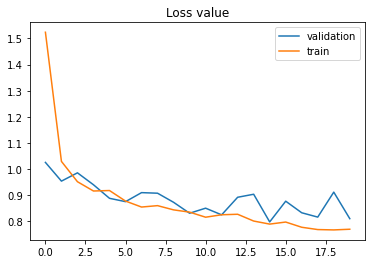

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.28      0.11      0.16       424
       Black       0.63      0.65      0.64      1030
       Asian       0.72      0.73      0.73       840
      Indian       0.75      0.79      0.77      1135
      Others       0.77      0.81      0.79      2497

    accuracy                           0.72      5926
   macro avg       0.63      0.62      0.62      5926
weighted avg       0.70      0.72      0.70      5926



In [25]:
#20 
inp = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(inp)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, validation_data=X_test, epochs=20)
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data for " , 'relu' , " function :")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(20), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(20), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(20), history.history["val_loss"], label="validation")
plt.plot(np.arange(20), history.history["loss"], label = "train")
plt.legend()
plt.show()
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

Clearly the accuracy increased in 20 epochs. The model should have a good performance on new unseen data  and inorder to achieve this goal , the decreasing gradient should find the best possible weights and bias.So we need multiple of iteration to have the impact of all parameters and neurons to find extermum point correctly. This will be done until we find the point, in which the model starts overfittung. Some soulutions to prevent this are stopping training on the exact point of ovwrfitting, using regularization and dropouts.

## MSE

Epoch 1/20
556/556 [==============================] - 59s 105ms/step - loss: 0.2294 - accuracy: 0.4260 - val_loss: 0.2315 - val_accuracy: 0.4214
Epoch 2/20
556/556 [==============================] - 59s 106ms/step - loss: 0.2294 - accuracy: 0.4264 - val_loss: 0.2315 - val_accuracy: 0.4214
Epoch 3/20
556/556 [==============================] - 59s 105ms/step - loss: 0.2294 - accuracy: 0.4264 - val_loss: 0.2315 - val_accuracy: 0.4214
Epoch 4/20
556/556 [==============================] - 59s 106ms/step - loss: 0.2294 - accuracy: 0.4264 - val_loss: 0.2315 - val_accuracy: 0.4214
Epoch 5/20
556/556 [==============================] - 58s 105ms/step - loss: 0.2294 - accuracy: 0.4264 - val_loss: 0.2315 - val_accuracy: 0.4214
Epoch 6/20
556/556 [==============================] - 58s 105ms/step - loss: 0.2294 - accuracy: 0.4264 - val_loss: 0.2315 - val_accuracy: 0.4214
Epoch 7/20
556/556 [==============================] - 59s 105ms/step - loss: 0.2294 - accuracy: 0.4264 - val_loss: 0.2315 - val_ac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


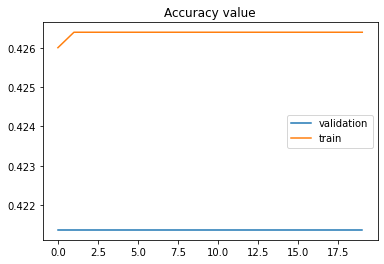

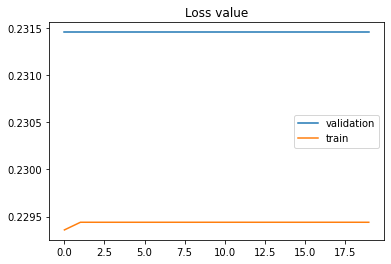

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.00      0.00      0.00       424
       Black       0.00      0.00      0.00      1030
       Asian       0.00      0.00      0.00       840
      Indian       0.00      0.00      0.00      1135
      Others       0.42      1.00      0.59      2497

    accuracy                           0.42      5926
   macro avg       0.08      0.20      0.12      5926
weighted avg       0.18      0.42      0.25      5926



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
inp = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(inp)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)
model.compile(optimizer=optimizers.Adam(), loss="mean_squared_error", metrics=["accuracy"])
history = model.fit(X_train, validation_data=X_test, epochs=20)
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data for " , 'relu' , " function :")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(20), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(20), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(20), history.history["val_loss"], label="validation")
plt.plot(np.arange(20), history.history["loss"], label = "train")
plt.legend()
plt.show()
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

As we see above the this classification model does not respond well to this loss function. This loss function is mostly used for regression and not for classification, because here the distance between outputs is high and convergance does not occur.

## Regularization: 

Regularizers allow us to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.These penalties affect most on unbalanced nodes and prevents overfitting.

Epoch 1/20
556/556 [==============================] - 84s 150ms/step - loss: 1.6926 - accuracy: 0.4977 - val_loss: 1.3470 - val_accuracy: 0.5219
Epoch 2/20
556/556 [==============================] - 83s 149ms/step - loss: 1.1753 - accuracy: 0.6079 - val_loss: 1.0760 - val_accuracy: 0.6477
Epoch 3/20
556/556 [==============================] - 83s 149ms/step - loss: 1.0762 - accuracy: 0.6450 - val_loss: 1.0616 - val_accuracy: 0.6333
Epoch 4/20
556/556 [==============================] - 82s 148ms/step - loss: 1.0079 - accuracy: 0.6640 - val_loss: 1.0027 - val_accuracy: 0.6654
Epoch 5/20
556/556 [==============================] - 82s 147ms/step - loss: 1.0004 - accuracy: 0.6648 - val_loss: 1.0880 - val_accuracy: 0.6357
Epoch 6/20
556/556 [==============================] - 82s 148ms/step - loss: 0.9642 - accuracy: 0.6752 - val_loss: 0.9490 - val_accuracy: 0.6782
Epoch 7/20
556/556 [==============================] - 82s 148ms/step - loss: 0.9924 - accuracy: 0.6586 - val_loss: 0.9536 - val_ac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


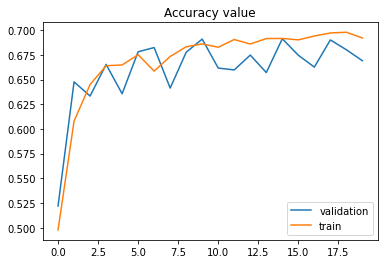

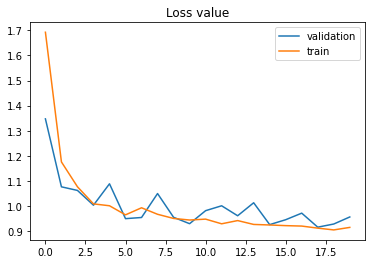

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.00      0.00      0.00       424
       Black       0.50      0.65      0.57      1030
       Asian       0.84      0.50      0.63       840
      Indian       0.65      0.82      0.73      1135
      Others       0.73      0.78      0.75      2497

    accuracy                           0.67      5926
   macro avg       0.54      0.55      0.53      5926
weighted avg       0.64      0.67      0.64      5926



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#20 
inp = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(inp)
output = layers.Dense(1024, activation='relu',    kernel_regularizer=regularizers.l2( l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-4))(output)

output = layers.Dense(512, activation='relu',    kernel_regularizer=regularizers.l2( l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-4))(output)

output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, validation_data=X_test, epochs=20)
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data for " , 'relu' , " function :")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(20), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(20), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(20), history.history["val_loss"], label="validation")
plt.plot(np.arange(20), history.history["loss"], label = "train")
plt.legend()
plt.show()
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

In this problem, the model is simple and using regularization and dropout is unnecessary and may even reduce the accuracy due to its underfitting effect.

## DropOut
Dropout ignores random neurons with the probability of 0.1(in this case) and it is one of the other metods of regularization to prevent overfitting.

Epoch 1/20
556/556 [==============================] - 59s 105ms/step - loss: 1.5720 - accuracy: 0.4778 - val_loss: 1.3210 - val_accuracy: 0.4747
Epoch 2/20
556/556 [==============================] - 59s 106ms/step - loss: 1.1701 - accuracy: 0.5459 - val_loss: 1.1111 - val_accuracy: 0.5417
Epoch 3/20
556/556 [==============================] - 58s 105ms/step - loss: 1.1130 - accuracy: 0.5683 - val_loss: 1.0004 - val_accuracy: 0.6585
Epoch 4/20
556/556 [==============================] - 58s 105ms/step - loss: 1.0690 - accuracy: 0.5959 - val_loss: 1.0069 - val_accuracy: 0.6198
Epoch 5/20
556/556 [==============================] - 58s 104ms/step - loss: 1.0515 - accuracy: 0.6043 - val_loss: 0.9401 - val_accuracy: 0.6573
Epoch 6/20
556/556 [==============================] - 59s 105ms/step - loss: 1.0094 - accuracy: 0.6259 - val_loss: 1.0509 - val_accuracy: 0.6343
Epoch 7/20
556/556 [==============================] - 59s 105ms/step - loss: 1.0063 - accuracy: 0.6290 - val_loss: 0.8914 - val_ac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


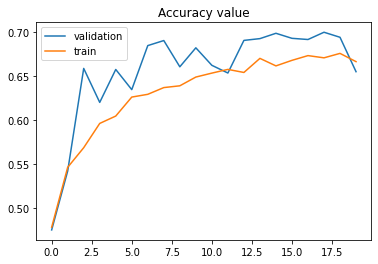

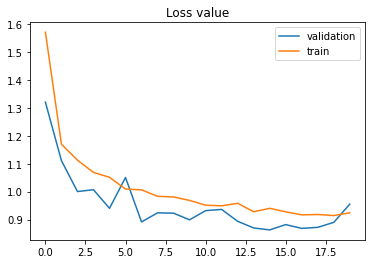

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.00      0.00      0.00       424
       Black       0.74      0.36      0.49      1030
       Asian       0.71      0.43      0.54       840
      Indian       0.75      0.76      0.76      1135
      Others       0.61      0.92      0.73      2497

    accuracy                           0.65      5926
   macro avg       0.56      0.49      0.50      5926
weighted avg       0.63      0.65      0.61      5926



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#20 
inp = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(inp)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dropout(0.1)(output)
output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, validation_data=X_test, epochs=20)
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data for " , 'relu' , " function :")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(20), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(20), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(20), history.history["val_loss"], label="validation")
plt.plot(np.arange(20), history.history["loss"], label = "train")
plt.legend()
plt.show()
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

Epoch 1/20
556/556 [==============================] - 58s 104ms/step - loss: 1.5161 - accuracy: 0.5212 - val_loss: 1.1632 - val_accuracy: 0.5688
Epoch 2/20
556/556 [==============================] - 58s 104ms/step - loss: 1.0465 - accuracy: 0.6163 - val_loss: 0.9604 - val_accuracy: 0.6588
Epoch 3/20
556/556 [==============================] - 58s 105ms/step - loss: 0.9827 - accuracy: 0.6469 - val_loss: 0.9896 - val_accuracy: 0.6402
Epoch 4/20
556/556 [==============================] - 58s 105ms/step - loss: 0.9209 - accuracy: 0.6746 - val_loss: 0.9200 - val_accuracy: 0.6711
Epoch 5/20
556/556 [==============================] - 58s 104ms/step - loss: 0.9065 - accuracy: 0.6782 - val_loss: 0.9158 - val_accuracy: 0.6750
Epoch 6/20
556/556 [==============================] - 58s 105ms/step - loss: 0.8927 - accuracy: 0.6840 - val_loss: 0.9092 - val_accuracy: 0.6871
Epoch 7/20
556/556 [==============================] - 58s 104ms/step - loss: 0.8921 - accuracy: 0.6814 - val_loss: 0.9097 - val_ac

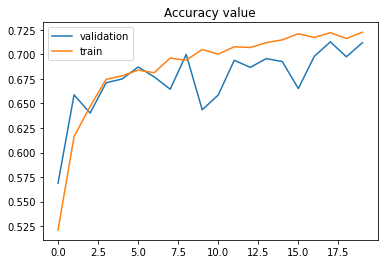

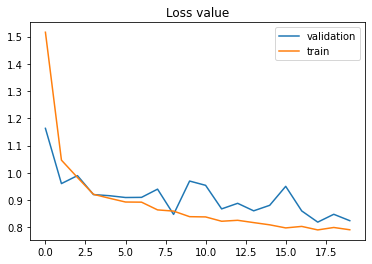

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.44      0.04      0.08       424
       Black       0.63      0.63      0.63      1030
       Asian       0.61      0.82      0.70       840
      Indian       0.76      0.79      0.78      1135
      Others       0.77      0.79      0.78      2497

    accuracy                           0.71      5926
   macro avg       0.64      0.61      0.59      5926
weighted avg       0.70      0.71      0.69      5926



In [32]:
# best model:
#20 
inp = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(inp)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation='relu')(output)
output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)
model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, validation_data=X_test, epochs=20)
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data for " , 'relu' , " function :")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(20), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(20), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(20), history.history["val_loss"], label="validation")
plt.plot(np.arange(20), history.history["loss"], label = "train")
plt.legend()
plt.show()
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

In [40]:
y_pred

array([3, 1, 2, ..., 4, 3, 3])

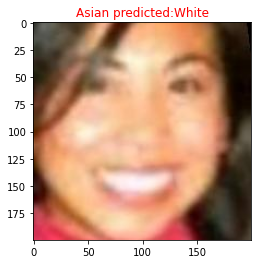

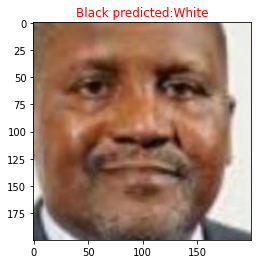

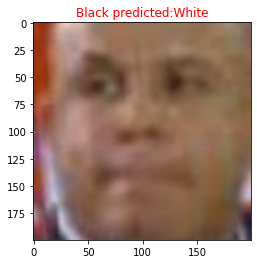

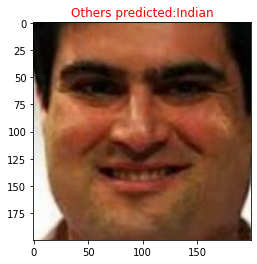

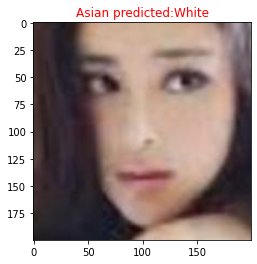

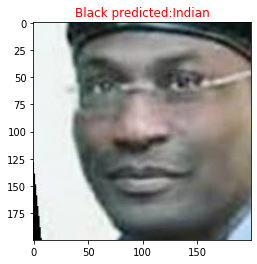

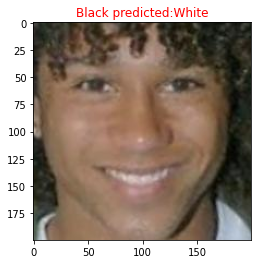

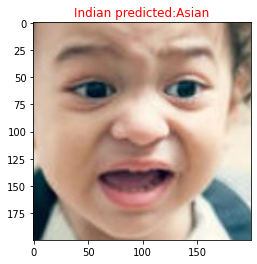

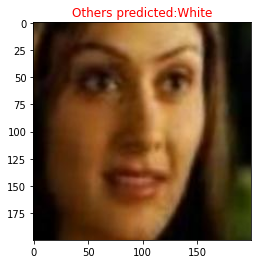

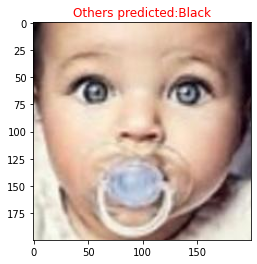

In [153]:

import cv2
j = 10
cnt = 0

while(cnt<10):
  if(y_true[j] == y_pred[j] ) :
    j+=1
    continue
  else:
    img = cv2.cvtColor(cv2.imread(X_test.filenames[j]) ,cv2.COLOR_BGR2RGB)
    plt.title(class_labels[4-y_true[j]] + " predicted:" + class_labels[4-y_pred[j]] , c ='r')
    plt.imshow(img)
    plt.show()
    j += 1
    cnt+=1

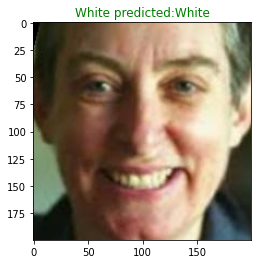

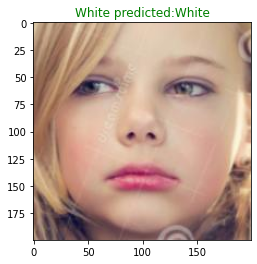

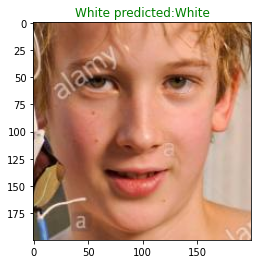

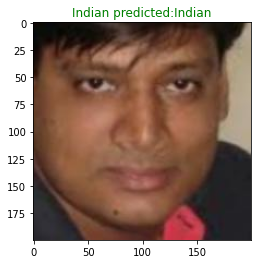

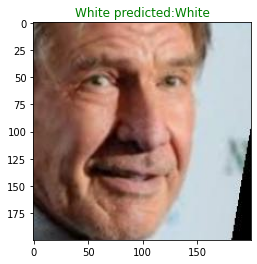

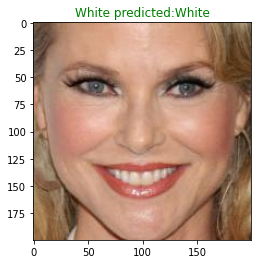

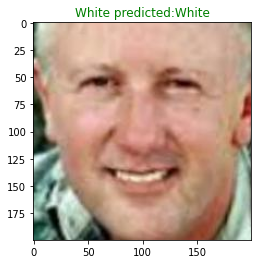

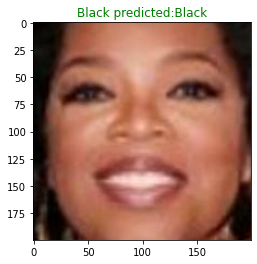

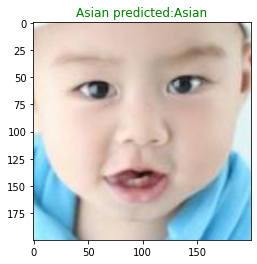

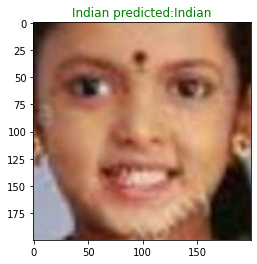

In [154]:
j = 10
cnt = 0

while(cnt<10):
  if(y_true[j] != y_pred[j] ) :
    j+=1
    continue
  else:
    img = cv2.cvtColor(cv2.imread(X_test.filenames[j]) ,cv2.COLOR_BGR2RGB)
    plt.title(class_labels[4-y_true[j]] + " predicted:" + class_labels[4-y_pred[j]] , c ='g')
    plt.imshow(img)
    plt.show()
    j += 1
    cnt+=1

Epoch 1/20
556/556 [==============================] - 34s 61ms/step - loss: 1.3724 - accuracy: 0.4867 - val_loss: 1.3755 - val_accuracy: 0.4927
Epoch 2/20
556/556 [==============================] - 33s 60ms/step - loss: 1.1376 - accuracy: 0.5754 - val_loss: 1.1202 - val_accuracy: 0.5675
Epoch 3/20
556/556 [==============================] - 33s 60ms/step - loss: 1.0787 - accuracy: 0.6039 - val_loss: 1.0709 - val_accuracy: 0.6126
Epoch 4/20
556/556 [==============================] - 33s 59ms/step - loss: 1.0413 - accuracy: 0.6203 - val_loss: 1.0445 - val_accuracy: 0.6225
Epoch 5/20
556/556 [==============================] - 33s 59ms/step - loss: 0.9921 - accuracy: 0.6512 - val_loss: 1.0332 - val_accuracy: 0.6308
Epoch 6/20
556/556 [==============================] - 33s 60ms/step - loss: 0.9648 - accuracy: 0.6604 - val_loss: 0.9720 - val_accuracy: 0.6689
Epoch 7/20
556/556 [==============================] - 33s 59ms/step - loss: 0.9530 - accuracy: 0.6671 - val_loss: 0.9504 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


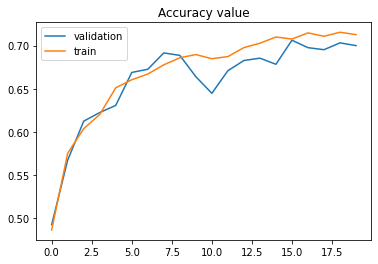

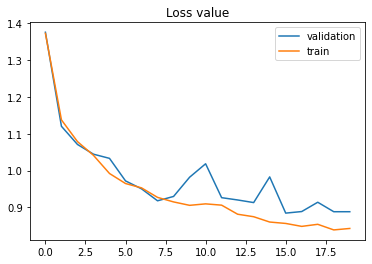

Classification Report fot Testing data

              precision    recall  f1-score   support

       White       0.00      0.00      0.00       424
       Black       0.57      0.60      0.59      1030
       Asian       0.66      0.77      0.71       840
      Indian       0.81      0.70      0.75      1135
      Others       0.72      0.84      0.78      2497

    accuracy                           0.70      5926
   macro avg       0.55      0.58      0.56      5926
weighted avg       0.65      0.70      0.67      5926



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:

inp = layers.Input(shape = (100, 100, 1))
output = layers.Flatten()(inp)
output = layers.Dense(256, activation='relu')(output)
output = layers.Dense(128, activation='relu')(output)

output = layers.Dense(2)(output)

encoder = models.Model(inp, output, name='encoder')

output = layers.Dense(5, activation="softmax")(output)

model = models.Model(inputs = inp, outputs = output)

model.compile(optimizer=optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, validation_data=X_test, epochs=20)
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data for " , 'relu' , " function :")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))
plt.figure()
plt.title('Accuracy value')
plt.plot(np.arange(20), history.history["val_accuracy"], label='validation')
plt.plot(np.arange(20), history.history["accuracy"], label='train')
plt.legend()
plt.show()

plt.figure()
plt.title('Loss value')
plt.plot(np.arange(20), history.history["val_loss"], label="validation")
plt.plot(np.arange(20), history.history["loss"], label = "train")
plt.legend()
plt.show()
y_true  = X_test.labels
y_pred = np.argmax(model.predict(X_test) , axis = 1)

print("Classification Report fot Testing data")
print()
print(classification_report(y_true, y_pred, target_names =[class_labels[i] for i in class_labels]))

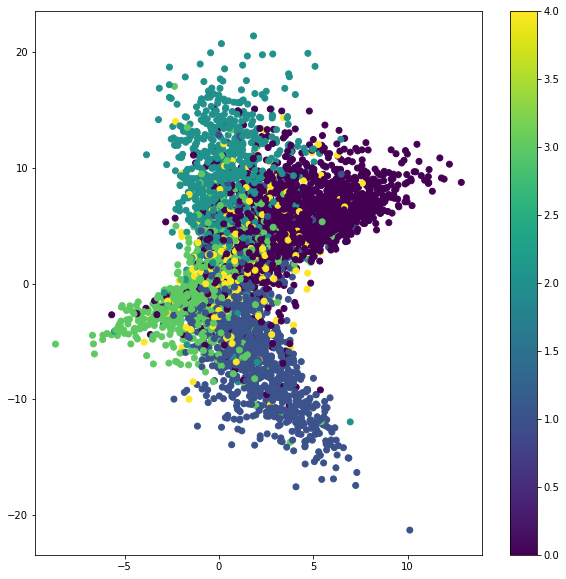

In [61]:
y_true = X_test.labels
X_test_encoded = encoder.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(X_test_encoded[:, 0], X_test_encoded[:, 1], c=[ 4-i for i in y_true])
plt.colorbar()
plt.show()


**class_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Others"}**

As we see above the model seperates black and white quite well from each other and other classes because they are very different in appereance too.As one can easily guess, Indians are similar to  to blacks and this happend here too.Moreover, Asians likes  Whites in some cases. The Others class is hard to classify because the faces are in a wide range and are dispersed every where(mostly as indian and asian and whites).